# Contents
## 1 Getting insights of data:
### 1.1 General insights:
    - No of variables (rows) & observations (columns)
    - No of Categorical features
    - No of Numerical features
    - No of bool features
### 1.2 Problem specific insights:
    - Missing Value columns & its %, 
        - Stacked bar chart
        - Spectrum chart
    - Numerical variables 
        - Skewed data columns
        - high collinearity columns
    - Categorical Variables
        - high cardinality: 
            - no of distinct values, 
            - columns with all distinct values 
    - Imbalance dataset or not
        - bar graph – frequency %

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv('train.csv')
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


### 1.1 General insights:

    - No of variables (rows) & observations (columns)
    - No of Categorical features
    - No of Numerical features
    - No of bool features

In [3]:
def eda_gen(dataframe):
    df = dataframe

    # No of Nows & Columns
    rows = df.shape[0]
    columns = df.shape[1]

    # Features count
    # No of Categorical features
    try:
        cate_features = df.dtypes.value_counts()[0]
    except:
        cate_features = 0
    # No of Numerical features
    try:
        num_features = df.dtypes.value_counts()[1]
    except:
        num_features = 0    
    # No of bool features    
    try:
        bool_features = df.dtypes.value_counts()[2]
    except:
        bool_features = 0    
    # '\033[4m' - underline, '\033[94m'- blue, "\033[0;0m"- end formating
    print('\033[4m' + '\033[94m'+ 'General insights:' + "\033[0;0m",
          '\nNo of rows :               ', rows,
          '\nNo of columns:             ',columns, 
          '\nNo of categorical features:', cate_features, 
          '\nNo of Numarical features:  ', num_features, 
          '\nNo of Boolean features:    ', bool_features)

In [4]:
eda_gen(df)

General insights: 
No of rows :                245725 
No of columns:              11 
No of categorical features: 7 
No of Numarical features:   4 
No of Boolean features:     0


### 1.2 Problem specific insights:
    1.2.1 - Missing Value columns & its %, 
            - Stacked bar chart
            - Spectrum chart

In [5]:
class eda_prob_spec:
    def __init__(self, dataframe):
        self.df = dataframe
    def missing_value_df(self):
        not_null_count = self.df.notnull().sum()
        null_count = self.df.isnull().sum()
        null_percentage = self.df.isnull().sum() * 100 / len(df)
        not_null_percentage = 100 - null_percentage
        missing_value_df = pd.DataFrame({'not_null_count': not_null_count,
                                         'null_count': null_count,
                                         'not_null_percent': not_null_percentage,
                                         'null_percent': null_percentage})
        missing_value_df.sort_values('null_percent', ascending=False, inplace=True)
        missing_value_df = missing_value_df[missing_value_df['null_count']>0]
        return(missing_value_df)
    def missing_value_plot(self):
        plt_df = self.missing_value_df()
        plt_df = plt_df.iloc[:,[2,3]]
        plt = plt_df.plot(kind='bar', stacked=True, title='Skacked Bar Chart')
        plt_msno = msno.matrix(self.df[plt_df.index], sparkline=False) # 
        #return plt, plt_msno

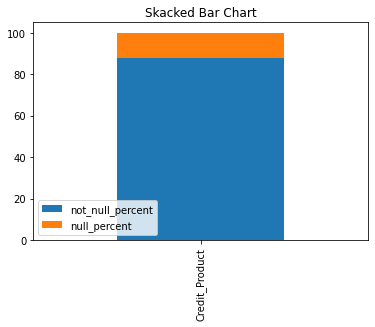

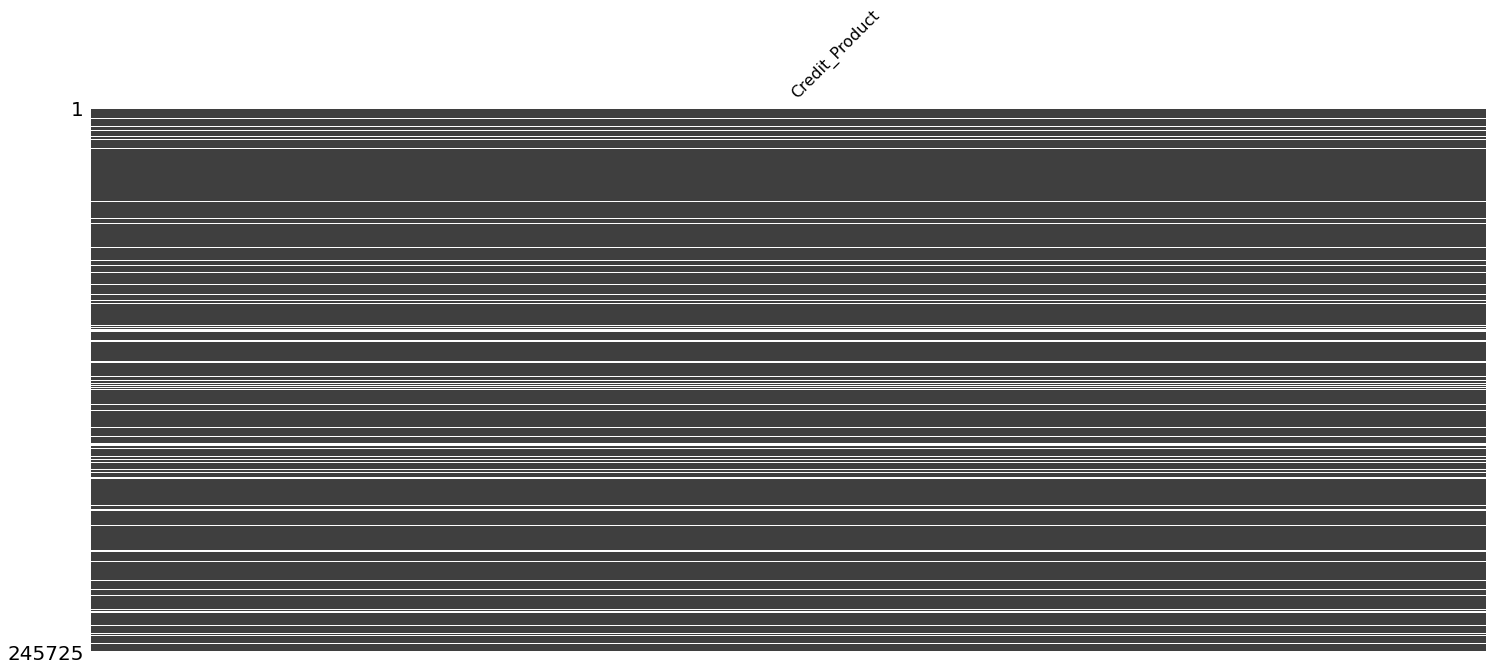

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #"last_expr"

df_null_stats = eda_prob_spec(df)
df_null_stats.missing_value_df()
df_null_stats.missing_value_plot()

    1.2.2 - Numerical variables 
            - Skewed data columns
            - high collinearity columns

### Skewness in the Data

In [7]:
'''
Descriptive Statistics:
    - Mean, std, 
    - Variance, Skewness, Kurtosis, Coefficient of Variation

Skewness:
    - data is considered to be normal if Skewness is between ‐2 to +2 and Kurtosis is between ‐7 to +7
    - Highly Skewed - less than -1 or greater than 1
    - moderately Skewed - between -1 and – 0.5 or between 0.5 and 1
    - Not Skewed - between -0.5 and 0.5
'''
df.var()   
df.skew(axis = 0, skipna = True)
df.kurtosis(axis = 0, skipna = True)

'\nDescriptive Statistics:\n    - Mean, std, \n    - Variance, Skewness, Kurtosis, Coefficient of Variation\n\nSkewness:\n    - data is considered to be normal if Skewness is between ‐2 to +2 and Kurtosis is between ‐7 to +7\n    - Highly Skewed - less than -1 or greater than 1\n    - moderately Skewed - between -1 and – 0.5 or between 0.5 and 1\n    - Not Skewed - between -0.5 and 0.5\n'

Age                    2.198895e+02
Vintage                1.046725e+03
Avg_Account_Balance    7.275004e+11
Is_Lead                1.809412e-01
dtype: float64

Age                    0.618992
Vintage                0.790189
Avg_Account_Balance    2.968727
Is_Lead                1.235596
dtype: float64

Age                    -0.441273
Vintage                -0.696540
Avg_Account_Balance    14.304594
Is_Lead                -0.473307
dtype: float64

In [8]:
# Coefficient of Variation
cv = lambda x: np.std(x, ddof=1) / np.mean(x)
df.loc[:,['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead']].apply(cv)

Age                    0.338119
Vintage                0.688964
Avg_Account_Balance    0.755879
Is_Lead                1.793242
dtype: float64

In [10]:
# Quantile Statistics
df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000



    1.2.3 - Categorical Variables
            - high cardinality: 
                - no of distinct values, 
                - columns with all distinct values 
    1.2.4 - Imbalance dataset or not
            - bar graph – frequency %

In [11]:
# Check whether all Dtypes are proper or not, else convert to relevent datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB
